# **K-means Algorithm**

---
---
Hanin HAMDI

Ahmed Yassine HAMMAMI

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


# Importing Dataset : train and test


In [ ]:
USE_COLAB = True
UPLOAD_OUTPUTS = False
if USE_COLAB:
    # mount the goole drive
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    # download data on GoogleDrive
    data_dir = "/content/drive/My Drive/ROB311/task6"
else:
    data_dir = "data/"

Mounted at /content/drive


In [ ]:
train_data = 'optdigits.tra'
train_dataset = pd.read_csv( os.path.join(data_dir, train_data))

In [ ]:
test_data = 'optdigits.tes'
test_dataset = pd.read_csv( os.path.join(data_dir, test_data))

# Exploring the test_dataset

In [ ]:
train_dataset

,0,1,6,15,12,1.1,0.1,0.2,0.3,7,16,6.1,6.2,10,0.4,0.5,0.6,8,16.1,2,0.7,11,2.1,0.8,0.9,5,16.2,3,0.10,5.1,7.1,0.11,0.12,7.2,13,3.1,0.13,8.1,7.3,0.14,0.15,4,12.1,0.16,1.2,13.1,5.2,0.17,0.18,0.19,14,9,15.1,9.1,0.20,0.21,0.22,0.23,6.3,14.1,7.4,1.3,0.24,0.25,0.26
0,0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0
1,0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7
2,0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4
3,0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6
4,0,0,11,16,10,1,0,0,0,4,16,10,15,8,0,0,0,4,16,3,11,13,0,0,0,1,14,6,9,14,0,0,0,0,0,0,12,10,0,0,0,0,0,6,16,6,0,0,0,0,5,15,15,8,8,3,0,0,10,16,16,16,16,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,0,0,5,13,11,2,0,0,0,2,15,6,5,12,0,0,0,6,12,0,1,16,2,0,0,1,12,5,5,16,6,0,0,0,1,9,9,12,8,0,0,0,0,0,0,3,13,0,0,0,0,0,1,8,10,0,0,0,8,13,15,10,1,0,9
3818,0,0,0,1,12,1,0,0,0,0,0,14,10,0,0,0,0,0,10,14,2,0,0,0,0,2,16,7,0,5,6,0,0,12,15,0,9,15,1,0,0,12,16,14,16,8,0,0,0,7,12,10,15,1,0,0,0,0,0,4,9,0,0,0,4
3819,0,0,3,15,0,0,0,0,0,0,11,14,0,0,0,0,0,0,13,8,0,0,0,0,0,0,16,8,4,0,0,0,0,1,16,16,16,15,2,0,0,6,16,14,11,15,7,0,0,0,15,15,9,15,4,0,0,0,4,14,16,9,0,0,6
3820,0,0,6,16,2,0,0,0,0,0,15,10,0,0,0,0,0,6,16,3,0,0,0,0,0,9,14,0,0,0,0,0,0,12,13,11,12,12,3,0,0,7,16,15,12,13,13,0,0,2,15,12,2,8,15,0,0,0,5,16,16,16,5,0,6


In [ ]:
from sklearn.model_selection import train_test_split
X_train = train_dataset.iloc[:, :-1].values
Y= train_dataset.iloc[:, 64].values

X_test = test_dataset.iloc[:, :-1].values
y1= test_dataset.iloc[:, 64].values

n_samples, n_features = X_train.shape
n_digits = len(np.unique(Y))
labels = Y

In [ ]:
print("n_digits: ",n_digits)
print ("n_features: ",n_features)
print ("n_samples: ",n_samples)

n_digits:  10
n_features:  64
n_samples:  3822


# The k-means algorithm 

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([3, 4, 8, ..., 7, 7, 4], dtype=int32)

In [ ]:
clusters = kmeans.fit_predict(X_train)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions. The cluster centers themselves are 64-dimensional points, and can be interpreted as the "typical" digit within the cluster. Let's see what these cluster centers look like:

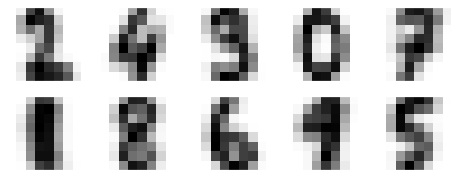

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(Y[mask])[0]
print(labels)
print(Y)

[0 7 1 ... 6 6 7]
[0 7 4 ... 6 6 7]


# Accuracy


In [ ]:
from sklearn.metrics import accuracy_score
print("K-MEANS ALGORITHM\n")
print("ACCURACY = ", accuracy_score(Y, labels))

K-MEANS ALGORITHM

ACCURACY =  0.8066457352171638


With a simple K-means algorithm, we discovered the correct grouping for 80% of the input digits

# Confusion Matrix

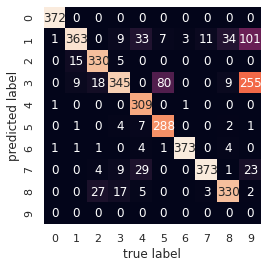

In [ ]:
from sklearn.metrics import confusion_matrix
x=[0,1,2,3,4,5,6,7,8,9]
y=[0,1,2,3,4,5,6,7,8,9]
mat = confusion_matrix(Y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=x,
            yticklabels=y)
plt.xlabel('true label')
plt.ylabel('predicted label');

# **K-means with PCA reduction**

Now, we will test the K-means algorithm with data reduction

In [ ]:
pca = PCA(.95)
reduced_data = pca.fit_transform(X_train)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
clusters = kmeans.fit_predict(reduced_data)
pca.n_components_

29

In [ ]:
kmeans.cluster_centers_.shape

(10, 29)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(Y[mask])[0]
print(labels)
print(Y)

[0 7 1 ... 6 6 7]
[0 7 4 ... 6 6 7]


# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print("K-MEANS ALGORITHM\n")
print("ACCURACY = ", accuracy_score(Y, labels))

K-MEANS ALGORITHM

ACCURACY =  0.8055991627420199


# Confusion Matrix

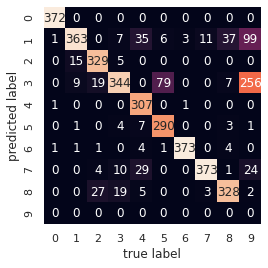

In [ ]:
from sklearn.metrics import confusion_matrix
x=[0,1,2,3,4,5,6,7,8,9]
y=[0,1,2,3,4,5,6,7,8,9]
mat = confusion_matrix(Y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=x,
            yticklabels=y)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Visualizing data with PCA reduction (components=2)


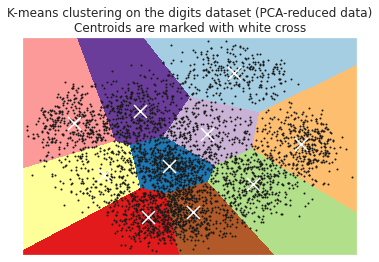

In [ ]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(X_train)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Writing our own code

In [83]:
# Using the euclidien distance to decide
def distance(instance1, instance2):
    """
    We will be using euclidien data for the clustering
    """
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)

    return np.linalg.norm(instance1 - instance2)

In [84]:
# A function which calculate the nearest centroid for each instance
def get_nearest_center(data,centers):
  distance1 = distance(data[:],centers[0][:])
  closest_class = 0
  for i in range(1,len(centers)):
    if distance(data[:],centers[i][:]) < distance1 :
      distance1 = distance(data,centers[i])
      closest_class = i
  return(closest_class)

In [95]:
# This function calculates the mean of each cluster 
def mean(kluster):
  mean = []
  for i in range(64):
    sum = 0
    for j in range(len(kluster)):
      sum += kluster[j][0][i]
    mean.append(sum/len(kluster))
  return(np.array(mean))

In [86]:
def equals(list1,list2):
  comparision = True
  for i in range(len(list1)):
    comparision = comparision and (list1[i] == list2[i]).all()
  return comparision

In [87]:
# This functions implements the K-means algorithm
def k_means(dataset,centers,klusters):
  klusters1 = klusters.copy()
  centers1 = centers.copy()
  test = True
  #loop = 0
  while test :
    klusters2 = [[],[],[],[],[],[],[],[],[],[]]
    centers2 = []
    # Calculating the new means : updating the centers
    for i in range(len(klusters1)):
      centers2.append(mean(klusters1[i]))
    # Updating the clusters
    for j in range(X_train.shape[0]):
      classe = get_nearest_center(X_train[j,:],centers2)
      klusters2[classe].append(X_train[j,:])
    # Testing whether we have convergence or not
    if equals(centers1,centers2):
      test = False
    else :
      centers1 = centers2.copy()
      klusters1 = klusters2.copy()
    #print(loop,"\n")
  return([klusters2,centers2])

In [88]:
# Choosing K
K = 10

In [89]:
# Initialise centroids randomly 
C1 = X_train[0,:]
C2 = X_train[1,:]
C3 = X_train[2,:]
C4 = X_train[3,:]
C5 = X_train[4,:]
C6 = X_train[5,:]
C7 = X_train[6,:]
C8 = X_train[7,:]
C9 = X_train[8,:]
C10 = X_train[9,:]
centers = [C1,C2,C3,C4,C5,C6,C7,C8,C9,C10]

In [90]:
# Initialize the K clusters 
kluster1 = [[X_train[0,:],Y[0]]]
kluster2 = [[X_train[1,:],Y[1]]]
kluster3 = [[X_train[2,:],Y[2]]]
kluster4 = [[X_train[3,:],Y[3]]]
kluster5 = [[X_train[4,:],Y[4]]]
kluster6 = [[X_train[5,:],Y[5]]]
kluster7 = [[X_train[6,:],Y[6]]]
kluster8 = [[X_train[7,:],Y[7]]]
kluster9 = [[X_train[8,:],Y[8]]]
kluster10 = [[X_train[9,:],Y[9]]]
klusters = [kluster1,kluster2,kluster3,kluster4,kluster5,kluster6,kluster7,kluster8,kluster9,kluster10]

In [91]:
# Initialisation of the clusters and the centers
for j in range(train_dataset.shape[0]):
  classe = get_nearest_center(X_train[j,:],centers)
  #print(classe,"\n")
  klusters[classe].append([X_train[j,:],Y[j]])

In [97]:
#[klusters1,centers1] = k_means(X_train,centers,klusters)